## Reduce Search Space using GHI visualizations on Americas
Given the vastness of the Americas, it would be expensive and difficult to create predictive models for every lon/lat combination. As such, we use this tool to help filter our search space to locations with notabely higher GHI levels through out the year. We also compare to a map of temperatures to further help reduce our search space. However, we also consider locations that are close to high population density areas (ie cities). 

#### Visualize best locations based on GHI
We can use the raster data to visualizes the best locations for placement based on GHI. 

In [20]:
from osgeo import gdal
import numpy as np
from matplotlib import pyplot as plt


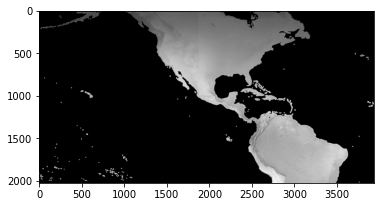

shape (2025, 3940)
max 7.5839996 min 0.0


In [21]:
# Read in File
ds = gdal.Open("nsrdb3_ghi.tif", gdal.GA_ReadOnly)
# channel = np.array(ds.GetRasterBand(1).ReadAsArray())
#Read channel 1 (only channel that's populated)
rb = ds.GetRasterBand(1)
img_array = rb.ReadAsArray()

#plot results
plt.imshow(img_array, cmap='gray', vmin=np.min(img_array), vmax=np.max(img_array))
plt.show()

#Metrics
print("shape", img_array.shape )
print("max",np.max(img_array), "min", np.min(img_array))

7.5839996


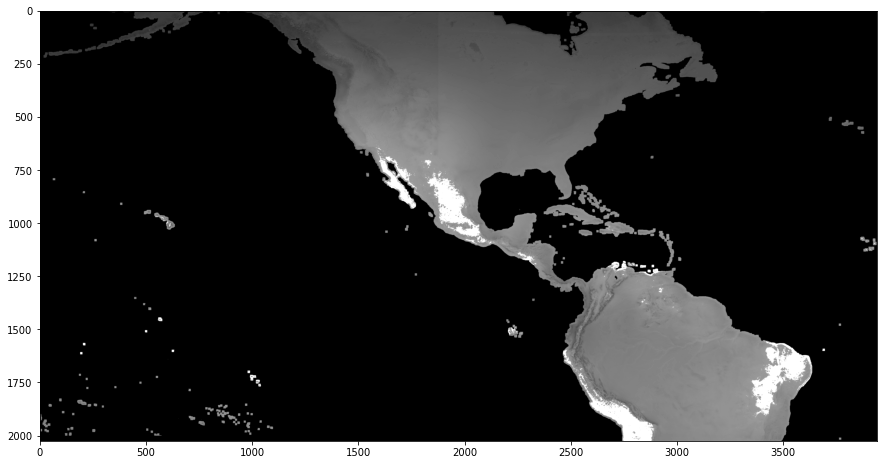

In [19]:
#Remove the ocean 
filt_map = np.where(img_array<0, 0, img_array)
#Highlight optimal locations
filt_map = np.where(img_array>np.max(img_array)*0.80, 10, img_array)
#get max for reference
print(np.max(img_array))
#plot figure
plt.figure(figsize=(15,20))
plt.imshow(filt_map,cmap='gray', vmin=0, vmax = np.max(filt_map))
plt.show()

## Observations:
TODO